# Data preprocessing and EDA PART

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("/content/Healthcare_dataset.csv")

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [2]:
# Step 2: Select the relevant columns
selected_columns = [
    'Age', 'Gender', 'Blood Type', 'Medical Condition',
    'Insurance Provider', 'Billing Amount', 'Admission Type', 'Test Results'
]
df = df[selected_columns].copy()

# Step 3: Check and remove missing and duplicate values
missing_counts = df.isnull().sum()
duplicate_count = df.duplicated().sum()

print("Missing values in each column:\n", missing_counts)
print("\nTotal duplicate rows:", duplicate_count)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)



Missing values in each column:
 Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Insurance Provider    0
Billing Amount        0
Admission Type        0
Test Results          0
dtype: int64

Total duplicate rows: 534


In [3]:
# Step 4: Check data types and unique value counts
print("\nData types:\n", df.dtypes)
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Step 5: Clean text columns (capitalize and strip spaces)
text_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Test Results']
for col in text_columns:
    df[col] = df[col].str.strip().str.title()

# Step 6: Descriptive statistics for numerical columns
print("\nDescriptive statistics:\n", df.describe())




Data types:
 Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Insurance Provider     object
Billing Amount        float64
Admission Type         object
Test Results           object
dtype: object

Unique values in each column:
Age: 77 unique values
Gender: 2 unique values
Blood Type: 8 unique values
Medical Condition: 6 unique values
Insurance Provider: 5 unique values
Billing Amount: 50000 unique values
Admission Type: 3 unique values
Test Results: 3 unique values

Descriptive statistics:
                 Age  Billing Amount
count  54966.000000    54966.000000
mean      51.535185    25544.306284
std       19.605661    14208.409711
min       13.000000    -2008.492140
25%       35.000000    13243.718641
50%       52.000000    25542.749145
75%       68.000000    37819.858159
max       89.000000    52764.276736


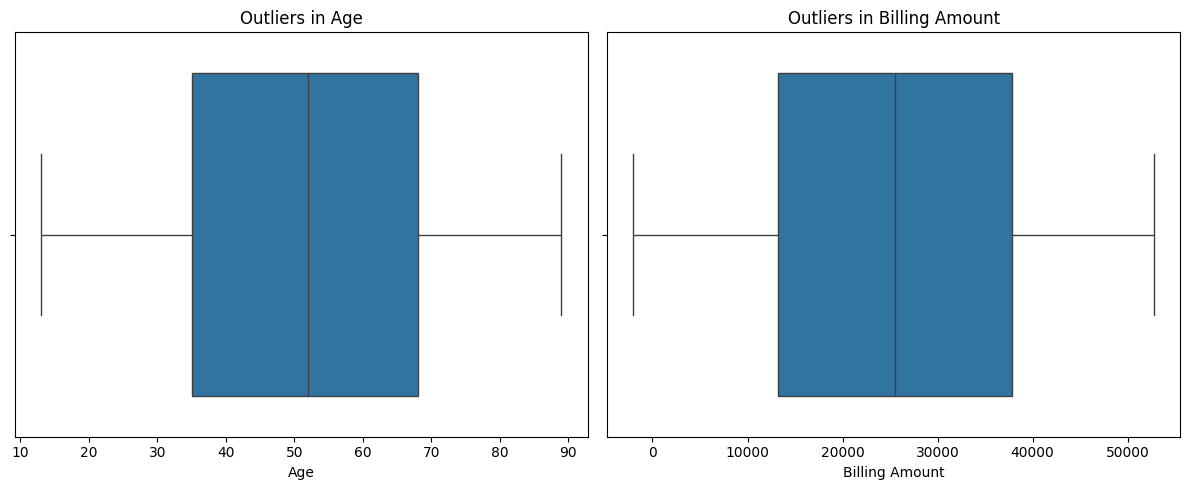

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Test Results
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Inconclusive
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Normal
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Abnormal
4,43,Female,Ab+,Cancer,Aetna,14238.317814,Urgent,Abnormal
5,36,Male,A+,Asthma,Unitedhealthcare,48145.110951,Urgent,Normal


In [4]:
# Step 7: Visual check for outliers in Age and Billing Amount
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["Age"])
plt.title("Outliers in Age")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Billing Amount"])
plt.title("Outliers in Billing Amount")

plt.tight_layout()
plt.show()

# Step 8: Preview cleaned data (from index 1)
df.iloc[1:6]


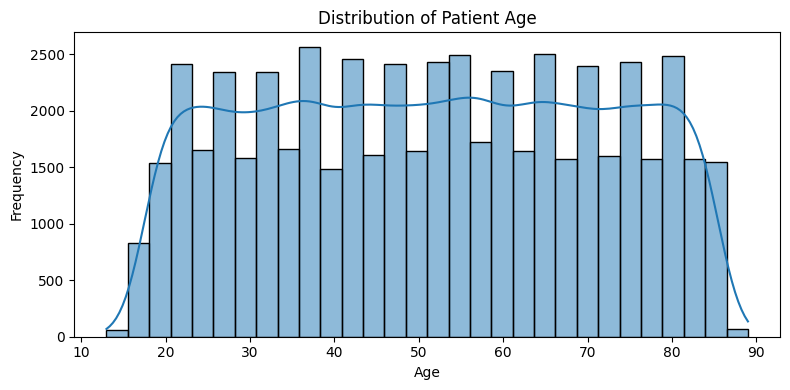

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribution of Patient Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



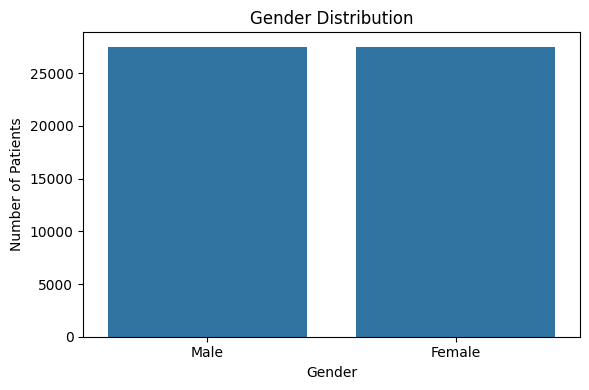

In [6]:
# 2. Gender Distribution (Countplot)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()



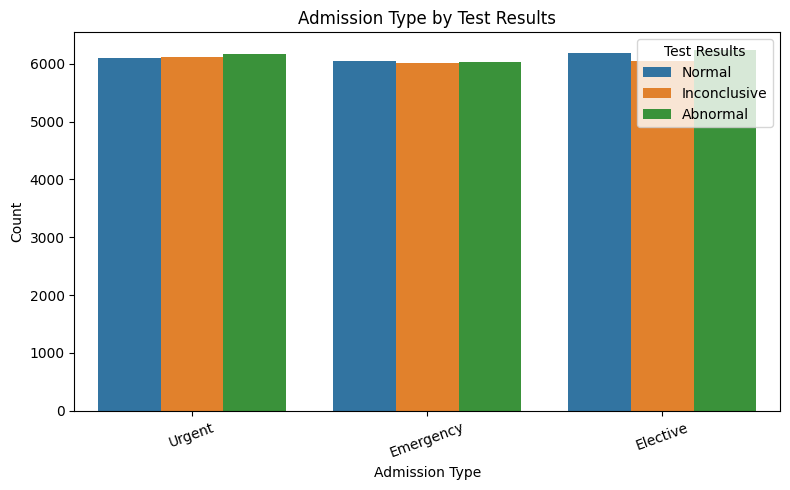

In [7]:
# 3. Admission Type vs Test Results
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Admission Type', hue='Test Results')
plt.title("Admission Type by Test Results")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()



<ipython-input-8-61521f900453>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Test Results', data=df, order=['Normal', 'Abnormal'], palette='Set2')


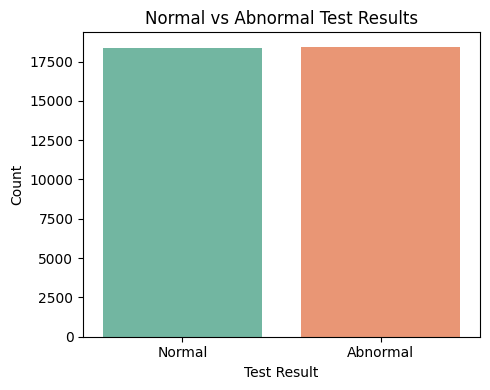

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot: Normal vs Abnormal
plt.figure(figsize=(5, 4))
sns.countplot(x='Test Results', data=df, order=['Normal', 'Abnormal'], palette='Set2')
plt.title('Normal vs Abnormal Test Results')
plt.xlabel('Test Result')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


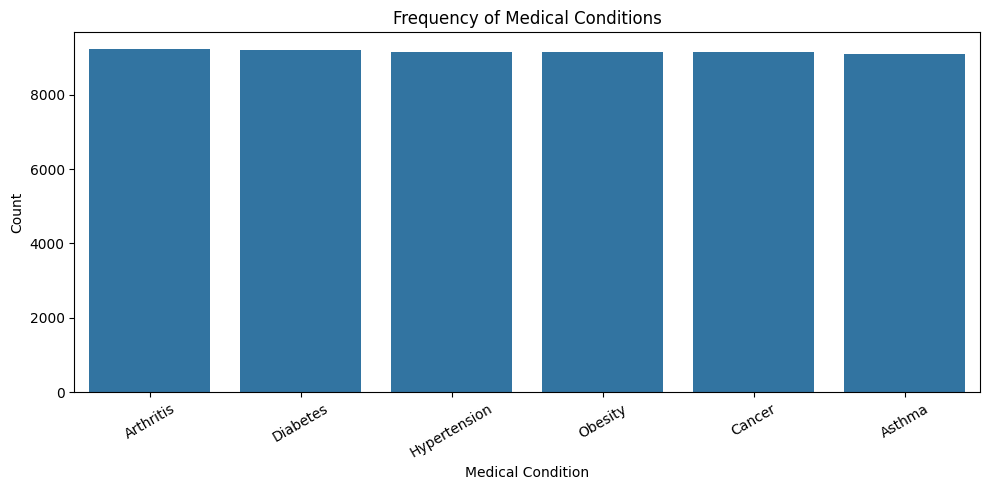

In [9]:
# 4. Medical Condition Frequency
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Medical Condition', order=df['Medical Condition'].value_counts().index)
plt.title("Frequency of Medical Conditions")
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



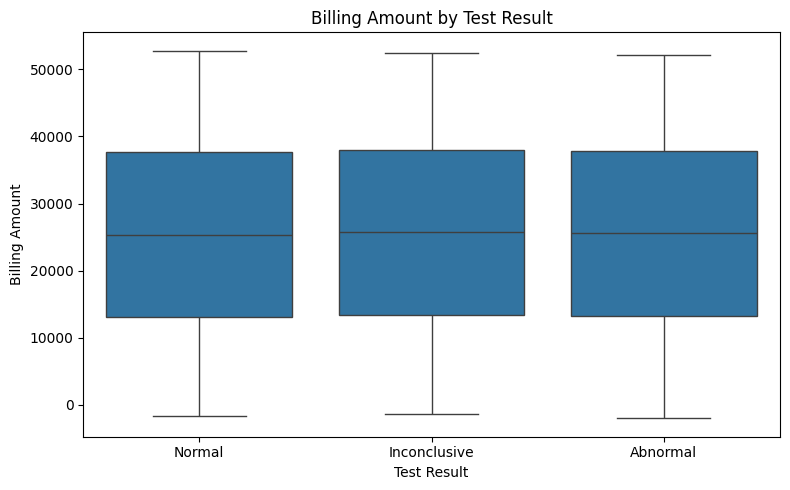

In [10]:
# 5. Boxplot of Billing Amount grouped by Test Result
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Test Results', y='Billing Amount')
plt.title("Billing Amount by Test Result")
plt.xlabel("Test Result")
plt.ylabel("Billing Amount")
plt.tight_layout()
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the original cleaned DataFrame
df_binary = df[df['Test Results'].isin(['Normal', 'Abnormal'])].copy()

# Columns that need to be label encoded
columns_to_encode = [
    'Gender',              # Categorical (e.g., Male, Female)
    'Blood Type',          # Categorical (e.g., A+, O-)
    'Medical Condition',   # Categorical (e.g., Diabetes, Asthma)
    'Insurance Provider',  # Categorical (e.g., Medicare, Aetna)
    'Admission Type',      # Categorical (e.g., Emergency, Elective)
    'Test Results'         # Target variable (Normal, Abnormal)
]

# Dictionary to keep track of encoders and what each class is encoded as
encoders = {}
label_mappings = {}

# Encode each column and store the encoder and class mapping
for col in columns_to_encode:
    le = LabelEncoder()
    df_binary[col] = le.fit_transform(df_binary[col])
    encoders[col] = le
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Show what each label was converted to
for col, mapping in label_mappings.items():
    print(f"Encoding for '{col}': {mapping}")


Encoding for 'Gender': {'Female': np.int64(0), 'Male': np.int64(1)}
Encoding for 'Blood Type': {'A+': np.int64(0), 'A-': np.int64(1), 'Ab+': np.int64(2), 'Ab-': np.int64(3), 'B+': np.int64(4), 'B-': np.int64(5), 'O+': np.int64(6), 'O-': np.int64(7)}
Encoding for 'Medical Condition': {'Arthritis': np.int64(0), 'Asthma': np.int64(1), 'Cancer': np.int64(2), 'Diabetes': np.int64(3), 'Hypertension': np.int64(4), 'Obesity': np.int64(5)}
Encoding for 'Insurance Provider': {'Aetna': np.int64(0), 'Blue Cross': np.int64(1), 'Cigna': np.int64(2), 'Medicare': np.int64(3), 'Unitedhealthcare': np.int64(4)}
Encoding for 'Admission Type': {'Elective': np.int64(0), 'Emergency': np.int64(1), 'Urgent': np.int64(2)}
Encoding for 'Test Results': {'Abnormal': np.int64(0), 'Normal': np.int64(1)}


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Split the data into features and target
X = df_binary[[
    'Age', 'Gender', 'Blood Type', 'Medical Condition',
    'Insurance Provider', 'Billing Amount', 'Admission Type'
]]
y = df_binary['Test Results']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train XGBoost Classifier (replacing SVM)
xgb_model = XGBClassifier( eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds, target_names=['Abnormal', 'Normal']))

# Train Artificial Neural Network (ANN) model
ann_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
ann_model.fit(X_train, y_train)
ann_preds = ann_model.predict(X_test)

# Evaluate ANN model
ann_accuracy = accuracy_score(y_test, ann_preds)
print("ANN Accuracy:", ann_accuracy)
print("ANN Classification Report:")
print(classification_report(y_test, ann_preds, target_names=['Abnormal', 'Normal']))


XGBoost Accuracy: 0.5174054936089203
XGBoost Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.52      0.54      0.53      3676
      Normal       0.52      0.50      0.51      3678

    accuracy                           0.52      7354
   macro avg       0.52      0.52      0.52      7354
weighted avg       0.52      0.52      0.52      7354

ANN Accuracy: 0.500407941256459
ANN Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.52      0.01      0.02      3676
      Normal       0.50      0.99      0.67      3678

    accuracy                           0.50      7354
   macro avg       0.51      0.50      0.34      7354
weighted avg       0.51      0.50      0.34      7354



In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Scale the features (ANN requires scaled input)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a stronger ANN model
ann_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),    # Two hidden layers
    activation='relu',              # Better for complex patterns
    solver='adam',                  # Fast and reliable optimizer
    learning_rate='adaptive',       # Adjust learning rate during training
    max_iter=1000,
    random_state=42
)

# Train and evaluate
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

ann_model.fit(X_train, y_train)
ann_preds = ann_model.predict(X_test)

ann_accuracy = accuracy_score(y_test, ann_preds)
ann_report = classification_report(y_test, ann_preds, target_names=['Abnormal', 'Normal'])

print("Tuned ANN Accuracy:", ann_accuracy)
print("Tuned ANN Classification Report:")
print(ann_report)


Tuned ANN Accuracy: 0.511422355180854
Tuned ANN Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.51      0.45      0.48      3676
      Normal       0.51      0.57      0.54      3678

    accuracy                           0.51      7354
   macro avg       0.51      0.51      0.51      7354
weighted avg       0.51      0.51      0.51      7354



In [14]:
# scaler to fit transform
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint, uniform

#  Tuned XGBoost
xgb_param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(1, 2)
}

xgb_search = RandomizedSearchCV(
    XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    param_distributions=xgb_param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    random_state=42
)
xgb_search.fit(X_train, y_train)
xgb_best = xgb_search.best_estimator_
xgb_preds = xgb_best.predict(X_test)

print("Tuned XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print(" Tuned XGBoost Best Parameters:", xgb_search.best_params_)
print(" Tuned XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds, target_names=['Abnormal', 'Normal']))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:13:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuned XGBoost Accuracy: 0.5356268697307588
 Tuned XGBoost Best Parameters: {'colsample_bytree': np.float64(0.7218455076693483), 'gamma': np.float64(0.048836057003191935), 'learning_rate': np.float64(0.21526990795364706), 'max_depth': 9, 'n_estimators': 287, 'reg_alpha': np.float64(0.12203823484477883), 'reg_lambda': np.float64(1.9903538202225404), 'subsample': np.float64(0.6137554084460873)}
 Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.53      0.55      0.54      3676
      Normal       0.54      0.52      0.53      3678

    accuracy                           0.54      7354
   macro avg       0.54      0.54      0.54      7354
weighted avg       0.54      0.54      0.54      7354



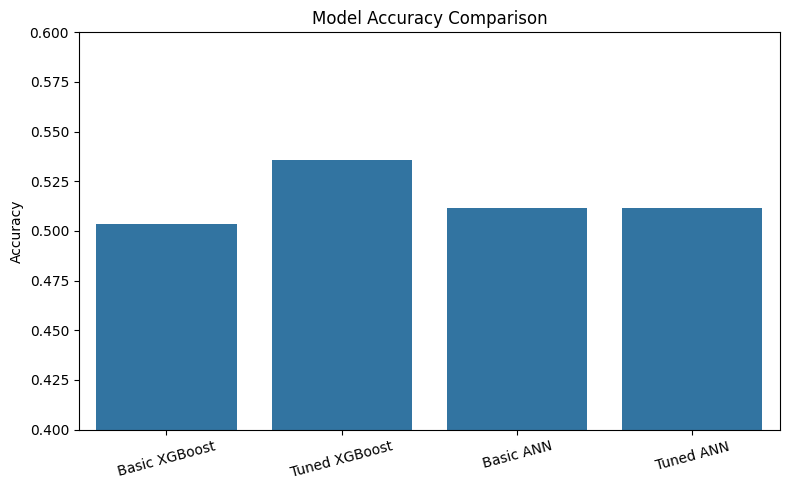

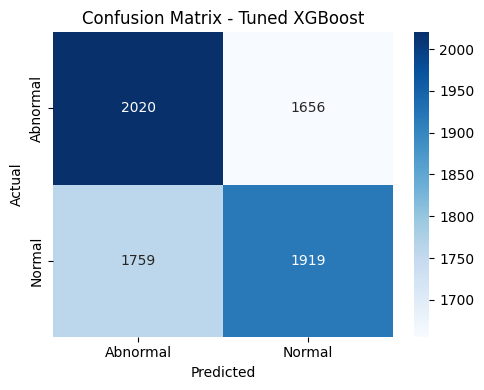

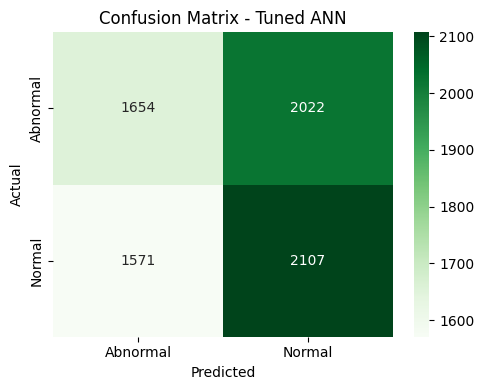

,Precision,Recall,F1-Score
Model,,,
Basic XGBoost,0.503,0.503,0.503
Tuned XGBoost,0.536,0.536,0.536
Basic ANN,0.512,0.511,0.510
Tuned ANN,0.512,0.511,0.510


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Accuracy Scores ---
xgb_basic_acc = accuracy_score(y_test, xgb_model.predict(X_test))
ann_basic_acc = accuracy_score(y_test, ann_model.predict(X_test))
xgb_tuned_acc = accuracy_score(y_test, xgb_preds)
ann_tuned_acc = accuracy_score(y_test, ann_preds)

# --- Accuracy Bar Chart ---
model_names = ['Basic XGBoost', 'Tuned XGBoost', 'Basic ANN', 'Tuned ANN']
accuracies = [xgb_basic_acc, xgb_tuned_acc, ann_basic_acc, ann_tuned_acc]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies)
plt.ylim(0.4, 0.6)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# --- Confusion Matrix: Tuned XGBoost ---
cm_xgb = confusion_matrix(y_test, xgb_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Abnormal', 'Normal'],
            yticklabels=['Abnormal', 'Normal'])
plt.title("Confusion Matrix - Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# --- Confusion Matrix: Tuned ANN ---
cm_ann = confusion_matrix(y_test, ann_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Abnormal', 'Normal'],
            yticklabels=['Abnormal', 'Normal'])
plt.title("Confusion Matrix - Tuned ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# --- Precision, Recall, F1-Score Summary Table ---
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

# Collect all model predictions
results_data = []
models = {
    'Basic XGBoost': xgb_model.predict(X_test),
    'Tuned XGBoost': xgb_preds,
    'Basic ANN': ann_model.predict(X_test),
    'Tuned ANN': ann_preds
}

for name, preds in models.items():
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, preds, average='weighted', zero_division=0)
    results_data.append({
        'Model': name,
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'F1-Score': round(f1, 3)
    })

# Convert to DataFrame and display
results_df = pd.DataFrame(results_data)
results_df.set_index("Model", inplace=True)
display(results_df)


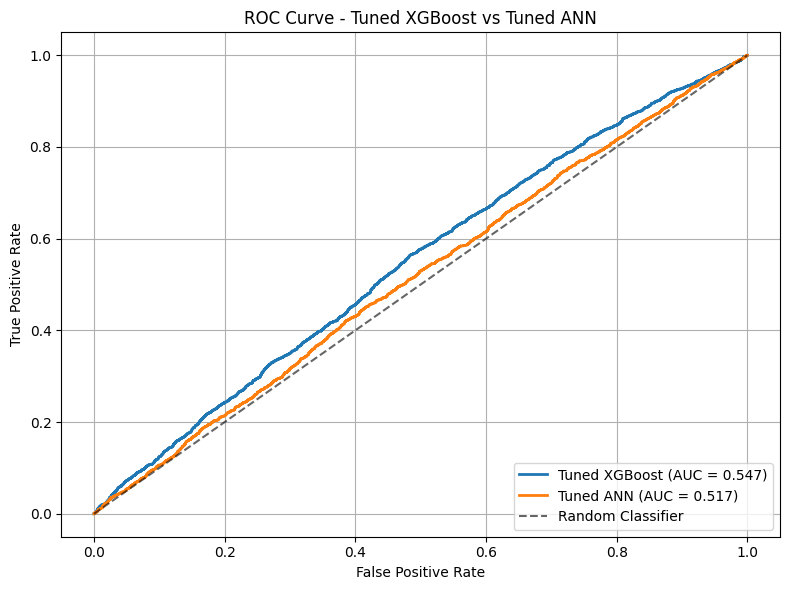

Tuned XGBoost AUC: 0.547
Tuned ANN AUC: 0.517


In [17]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# For XGBoost: Use the model you tuned (xgb_best)
xgb_probs = xgb_best.predict_proba(X_test)[:, 1]  # Already split from original X

# For ANN: Use ann_model (trained on scaled X)
ann_probs = ann_model.predict_proba(X_test)[:, 1]  # ann_model is the tuned ANN on scaled data

# AUC Scores
auc_xgb = roc_auc_score(y_test, xgb_probs)
auc_ann = roc_auc_score(y_test, ann_probs)

# ROC Curves
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'Tuned XGBoost (AUC = {auc_xgb:.3f})', linewidth=2)
plt.plot(fpr_ann, tpr_ann, label=f'Tuned ANN (AUC = {auc_ann:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', alpha=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned XGBoost vs Tuned ANN')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print AUC values
print(f"Tuned XGBoost AUC: {auc_xgb:.3f}")
print(f"Tuned ANN AUC: {auc_ann:.3f}")


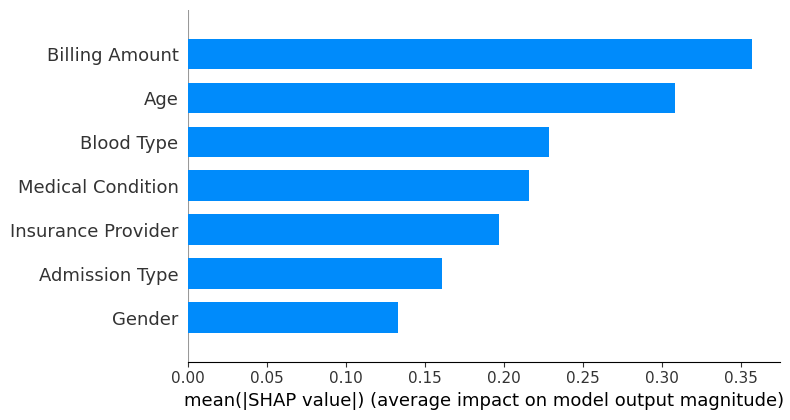

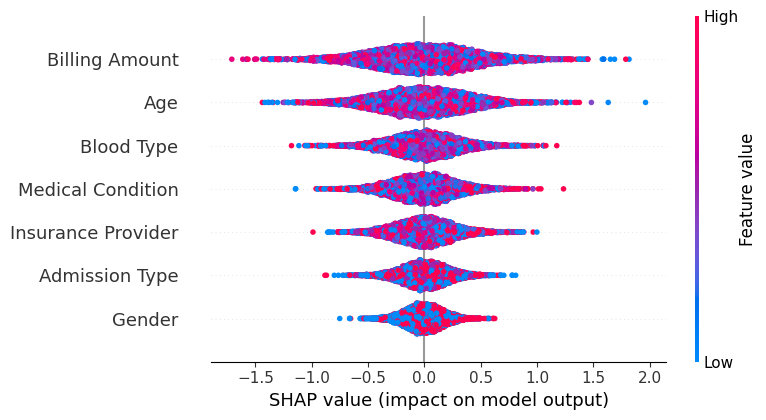

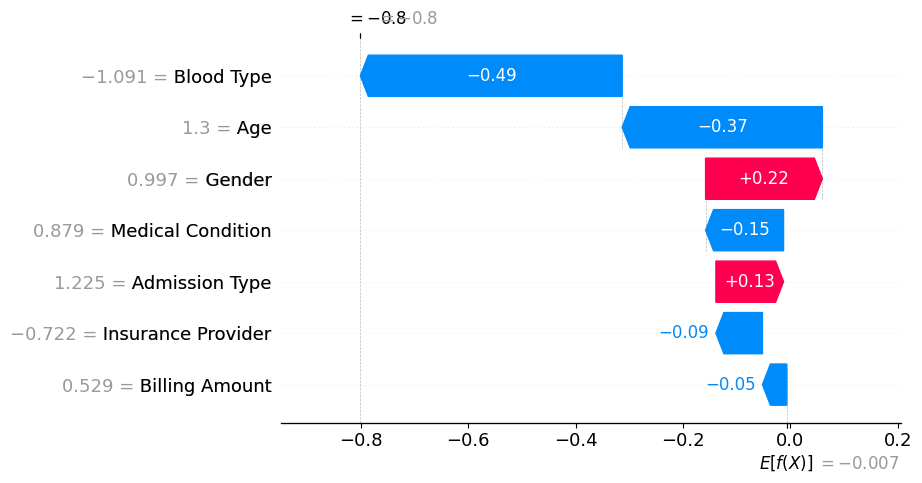

In [18]:
import shap
import pandas as pd


# This ensures feature names show up in SHAP plots
X_test_df = pd.DataFrame(X_test, columns=[
    'Age', 'Gender', 'Blood Type', 'Medical Condition',
    'Insurance Provider', 'Billing Amount', 'Admission Type'
])

# Use TreeExplainer (safe, avoids PyTorch)
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_test_df)

# Summary Plot (with correct column names)
shap.summary_plot(shap_values, X_test_df, plot_type="bar")
shap.summary_plot(shap_values, X_test_df)

# Waterfall for one prediction with feature names
# Convert shap_values to SHAP Explanation manually for one row
single_shap_vals = shap.Explanation(
    values=shap_values[0],
    base_values=explainer.expected_value,
    data=X_test_df.iloc[0],
    feature_names=X_test_df.columns
)

shap.plots.waterfall(single_shap_vals)
